## Compare the results of multiple experiments

In [1]:
import os
import sys
# Import .././ directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pathlib import Path
from flamekit.plotting import plot_results
import pandas as pd

Keys common to all results: ['acc', 'auc', 'epoch', 'f1', 'loss', 'lr', 'precision', 'recall', 'val_acc', 'val_auc', 'val_f1', 'val_loss', 'val_precision', 'val_recall']
Keys to display: ['loss', 'lr', 'val_acc', 'val_auc', 'val_f1', 'val_loss', 'val_precision', 'val_recall']


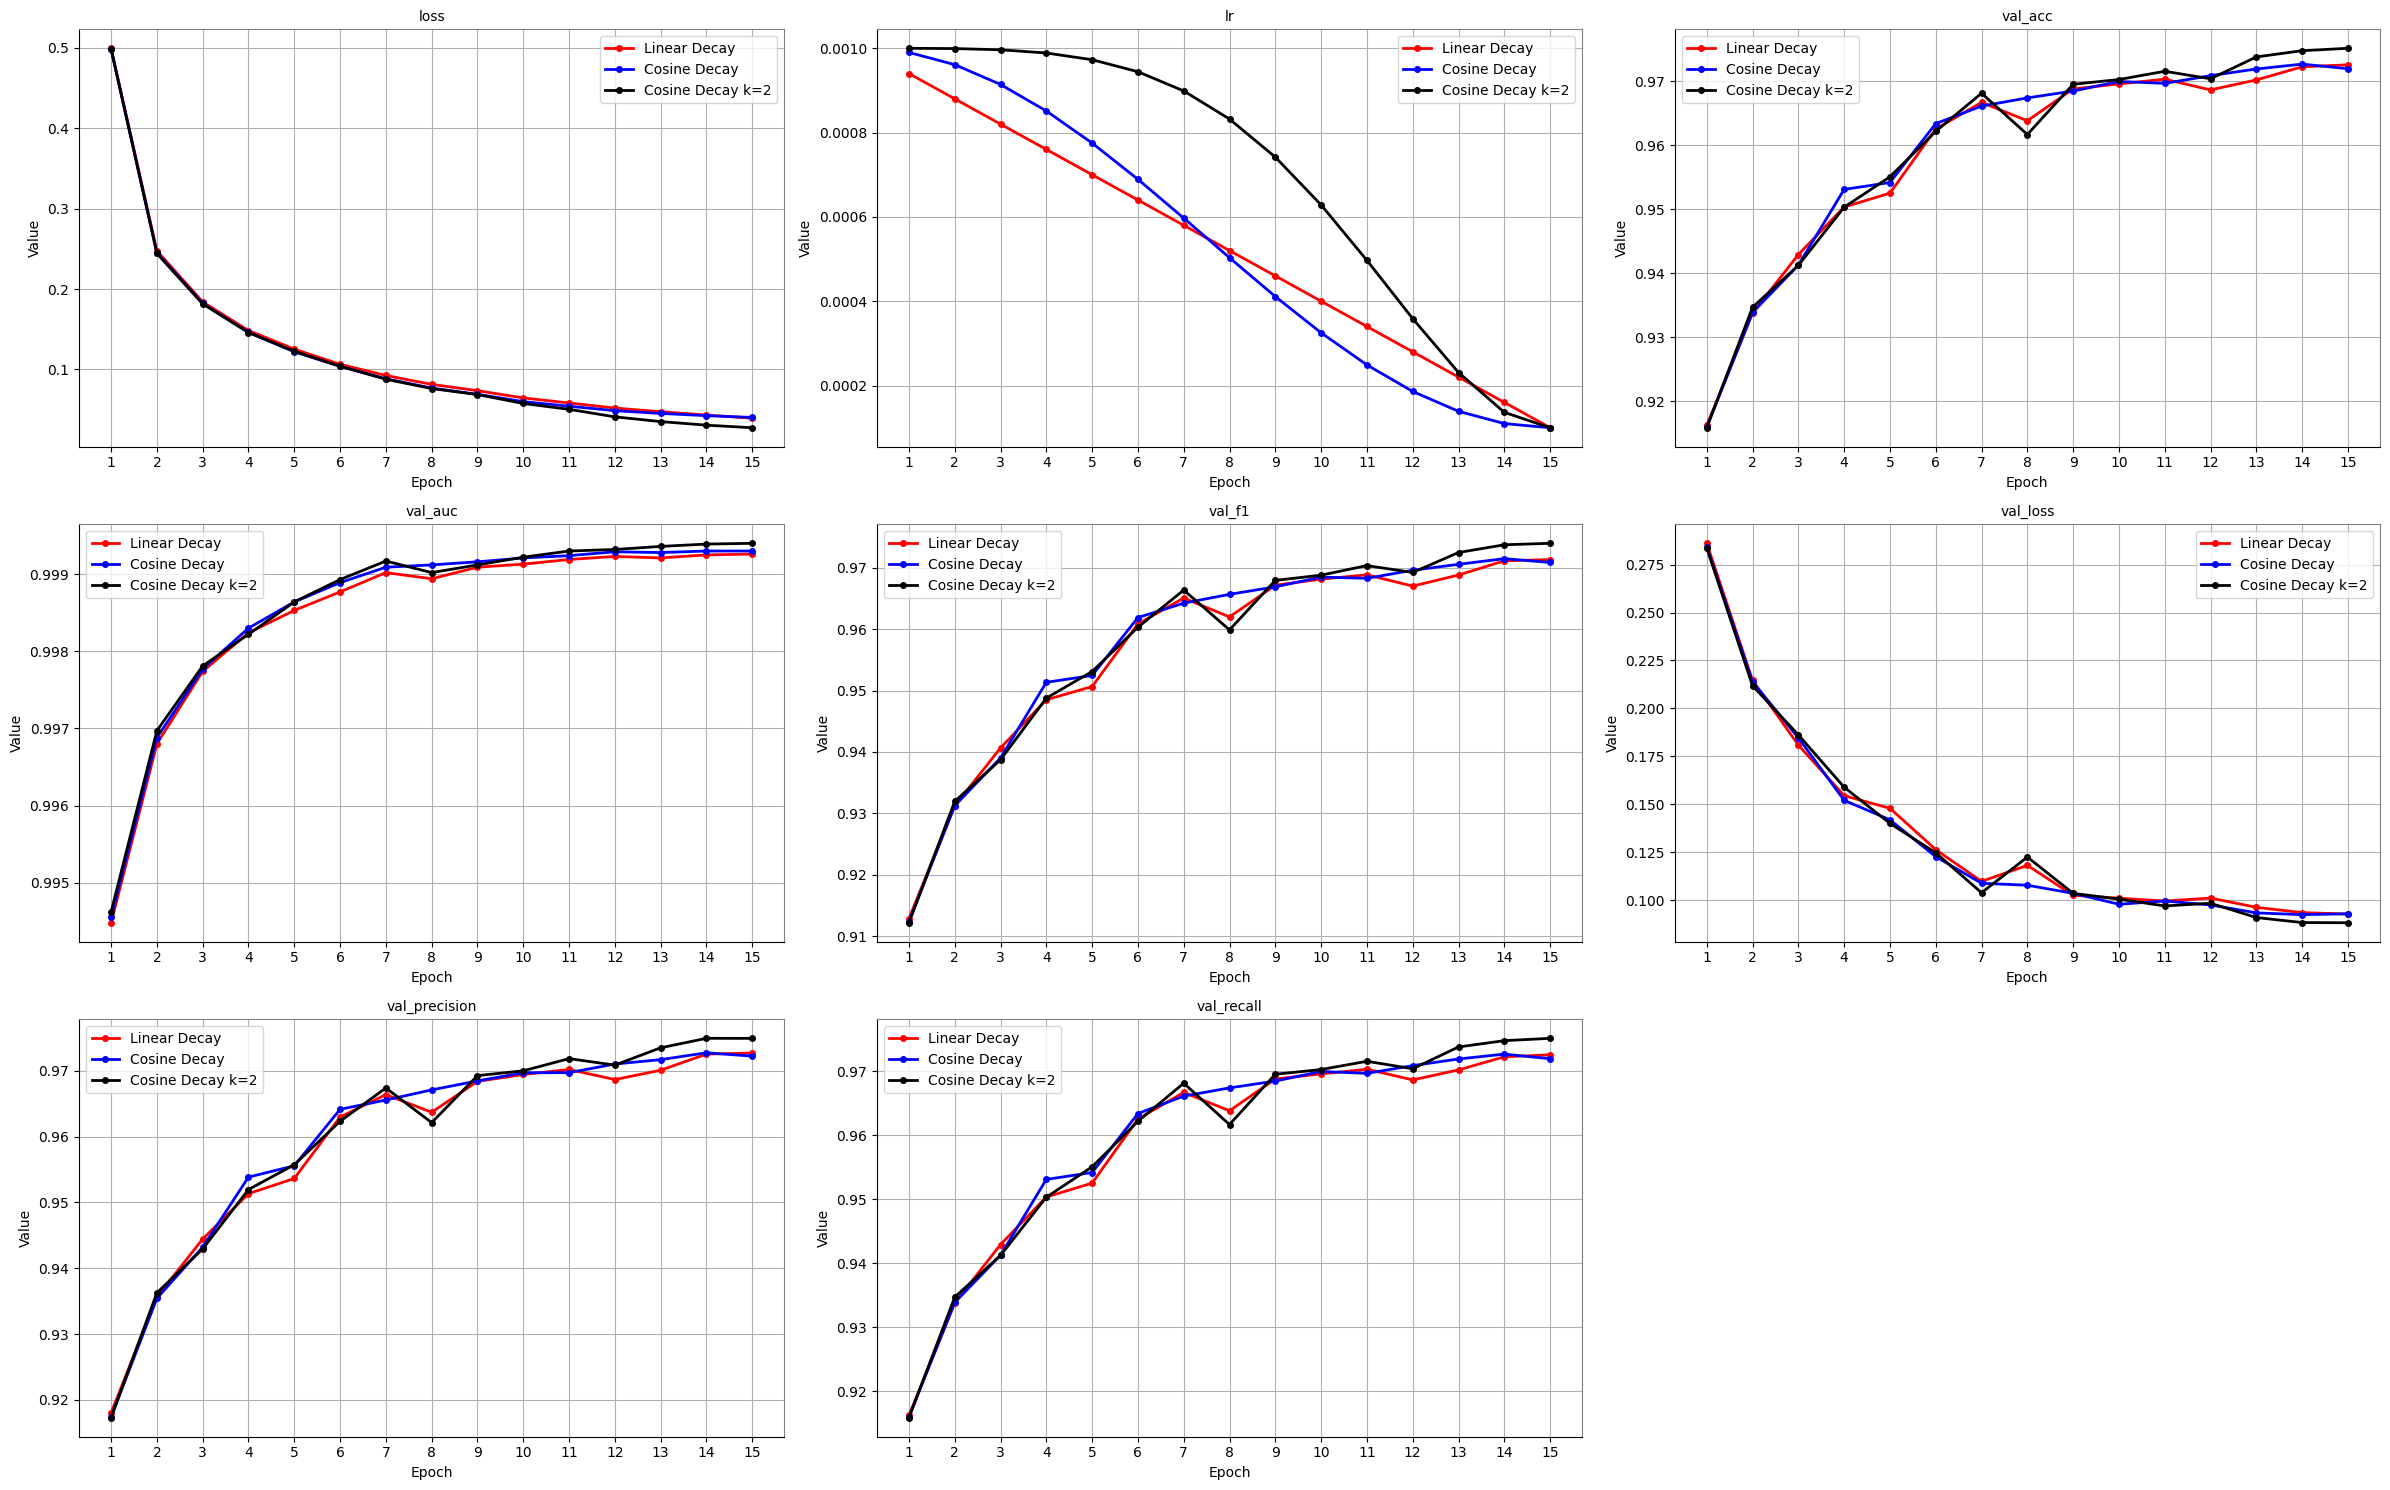

In [2]:
results = [
    './checkpoints/experiment_1/results.csv',
    './checkpoints/experiment_2/results.csv',
    './checkpoints/experiment_3/results.csv'
]
names = ['Linear Decay', 'Cosine Decay', 'Cosine Decay k=2']

results_dicts = []
for fpath in results:
    if isinstance(fpath, str):
        fpath = Path(fpath)
    if not fpath.exists():
        raise FileNotFoundError(f"File not found: {fpath}")
    if not fpath.is_file():
        raise ValueError(f"Path is not a file: {fpath}")
    df = pd.read_csv(fpath)
    columns = [c.strip() for c in df.columns]
    df.columns = columns
    dic = {c:df[c].to_numpy() for c in columns}
    results_dicts.append(dic)

metrics_to_display = ['lr', 'loss'] # And validation
def filter_metrics(metrics):
    return [m for m in metrics if 'val_' in m or m in metrics_to_display]

plot_results(results_dicts, names=names, dest_path=None, filter_keys=filter_metrics, verbose=True, colors=["red", "blue", "black"])